In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


<img src="img/company-logo.png" width=120 height=120 align="right">

Author: Prof. Manoel Gadi

Contact: manoelgadi@gmail.com

Teaching Web: http://mfalonso.pythonanywhere.com

Linkedin: https://www.linkedin.com/in/manoel-gadi-97821213/

Github: https://github.com/manoelgadi

Last revision: 27/October/2022


# Session 8 - Static Graphs in Python with Matplotlib and Seaborn

## Visualization Journey in Python

Visualization Journey in Python:
* from Pandas guessing system, 
* vising matplotlib fundamentals, 
* statiscal graphs with Seaborn, 
* Grammar of graphics from R ggplot in Python using Plotnine
* Dynamic graphics using Bokeh 
* and bulding dynamic dashboards with Dash and Plotly (built on top of Flask and JavaScript)

## Visualization with Matplotlib

Before running the beginning of the code below, please install the packages:

* pandas_datareader
* (potentially this in case of errors): yfinance



In Windows - Using Anaconda Prompt run: 
* pip install pandas_datareader
* (potentially this in case of errors) pip install yfinance


In Mac or Linux - Using the console run:

* sudo pip install pandas_datareader
* (potentially this in case of errors) sudo pip install yfinance 


Alternatvely, and only if you are having difficult doing the previous, try installing from within the Notebook : 

* !pip install pandas_datareader
* (potentially this in case of errors) !pip install yfinance 

In [6]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


---

In [7]:
import pandas as pd

#Because the is_list_like is moved to pandas.api.types # - we need to put pd.core.common.is_list_like = pd.api.types.is_list_like before you import pandas_datareader
#pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr

#import yfinance #This is fixing an error on data_reader and unabing to download data from Countries other than the USA.


In [8]:
ticker_asia_pacif =  'BTC-USD' # SSE Composite Index (000001.SS) -  Shanghai, China

In [9]:
df_index_asia_pacif = pdr.get_data_yahoo(ticker_asia_pacif, start='2012-01-12')
print(df_index_asia_pacif)


                    High           Low          Open         Close  \
Date                                                                 
2014-09-17    468.174011    452.421997    465.864014    457.334015   
2014-09-18    456.859985    413.104004    456.859985    424.440002   
2014-09-19    427.834991    384.532013    424.102997    394.795990   
2014-09-20    423.295990    389.882996    394.673004    408.903992   
2014-09-21    412.425995    393.181000    408.084991    398.821014   
...                  ...           ...           ...           ...   
2022-10-23  19646.652344  19124.197266  19207.734375  19567.007812   
2022-10-24  19589.125000  19206.324219  19567.769531  19345.572266   
2022-10-25  20348.412109  19261.447266  19344.964844  20095.857422   
2022-10-26  20938.134766  20076.117188  20092.236328  20770.441406   
2022-10-27  20849.746094  20484.906250  20775.890625  20673.232422   

                 Volume     Adj Close  
Date                                   
2014-09-1

In [10]:
df_index_asia_pacif.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2963 entries, 2014-09-17 to 2022-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2963 non-null   float64
 1   Low        2963 non-null   float64
 2   Open       2963 non-null   float64
 3   Close      2963 non-null   float64
 4   Volume     2963 non-null   int64  
 5   Adj Close  2963 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 162.0 KB


In [11]:
df_index_asia_pacif.shape

(2963, 6)

In [12]:
df_index_asia_pacif.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


## Let's check if we have any data that is null.

In [13]:
df_index_asia_pacif.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [14]:
df_index_asia_pacif.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2963.000000,2963.000000,2963.000000,2963.000000,2.963000e+03,2963.000000
mean,13082.304801,12391.278705,12755.791942,12761.071940,1.605321e+10,12761.071940
std,16770.248559,15864.663782,16350.420947,16345.917343,1.987124e+10,16345.917343
min,211.731003,171.509995,176.897003,178.102997,5.914570e+06,178.102997
25%,666.644989,651.551483,658.453003,658.371002,9.552865e+07,658.371002
50%,7003.220703,6684.169922,6843.470215,6844.229980,6.821380e+09,6844.229980
75%,15762.418457,14257.600098,15219.550293,15245.951172,2.774078e+10,15245.951172
max,68789.625000,66382.062500,67549.734375,67566.828125,3.509679e+11,67566.828125


In case we have NaNs, it's good idea to do something with it. In this case let's get read of the entire row with NaNs as they represent Holidays that were included by mistake.

In [15]:
df_index_asia_pacif = df_index_asia_pacif.dropna()

In [16]:
df_index_asia_pacif.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2963.000000,2963.000000,2963.000000,2963.000000,2.963000e+03,2963.000000
mean,13082.304801,12391.278705,12755.791942,12761.071940,1.605321e+10,12761.071940
std,16770.248559,15864.663782,16350.420947,16345.917343,1.987124e+10,16345.917343
min,211.731003,171.509995,176.897003,178.102997,5.914570e+06,178.102997
25%,666.644989,651.551483,658.453003,658.371002,9.552865e+07,658.371002
50%,7003.220703,6684.169922,6843.470215,6844.229980,6.821380e+09,6844.229980
75%,15762.418457,14257.600098,15219.550293,15245.951172,2.774078e+10,15245.951172
max,68789.625000,66382.062500,67549.734375,67566.828125,3.509679e+11,67566.828125


In [17]:
df_index_asia_pacif.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

## Working with time series (the index is a date)

In [18]:
df_index_asia_pacif.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
               '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27'],
              dtype='datetime64[ns]', name='Date', length=2963, freq=None)

In [19]:
df_index_asia_pacif.resample('2Q', closed='left').last()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,314.808990,309.372986,312.718994,310.737000,12528300,310.737000
2015-06-30,257.173004,248.580994,248.720993,257.063995,34742900,257.063995
2015-12-31,434.386993,422.084015,433.299988,426.619995,46889400,426.619995
2016-06-30,644.682007,628.283997,644.122009,639.890015,142456000,639.890015
2016-12-31,972.534973,934.833008,972.534973,961.237976,187474000,961.237976
2017-06-30,2588.830078,2510.479980,2567.560059,2539.320068,949979008,2539.320068
2017-12-31,14681.900391,12350.099609,14681.900391,12952.200195,14452599808,12952.200195
2018-06-30,6261.660156,5835.750000,5898.129883,6218.299805,3966230016,6218.299805
2018-12-31,3901.908936,3797.219238,3822.384766,3865.952637,4770578575,3865.952637


In [20]:
df_index_asia_pacif.resample('M').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-30,421.104422,398.174641,412.654003,407.182428,2.934864e+07,407.182428
2014-10-31,374.314260,354.856645,365.748000,364.148873,2.912885e+07,364.148873
2014-11-30,376.494235,357.241831,364.850235,366.099799,2.199111e+07,366.099799
2014-12-31,347.487129,336.565775,343.074836,341.267871,1.784201e+07,341.267871
2015-01-31,261.391583,240.495550,251.799905,248.782547,3.544555e+07,248.782547
...,...,...,...,...,...,...
2022-06-30,25228.663672,23752.240495,24783.338477,24383.685482,3.079797e+10,24383.685482
2022-07-31,22012.192729,20958.936996,21424.733052,21539.253843,2.992201e+10,21539.253843
2022-08-31,22870.607863,22075.572203,22471.866557,22366.266318,2.884492e+10,22366.266318


## Ploting graph using Pandas Built-in Matplotlib fuction

Text(0, 0.5, 'Precio Bitcoin en dolares')

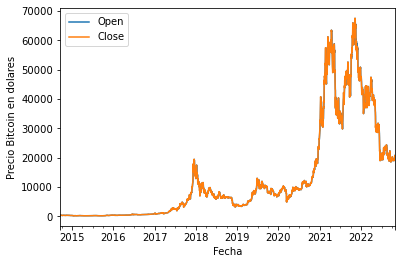

In [21]:
ax = df_index_asia_pacif[['Open','Close']].plot()
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Bitcoin en dolares')

Text(0, 0.5, 'SSE Composite Index (000001.SS) -  Shanghai, China')

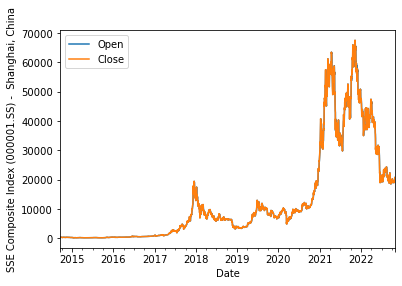

In [22]:
#%matplotlib inline
ax = df_index_asia_pacif[['Open','Close']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('SSE Composite Index (000001.SS) -  Shanghai, China')
#ax.legend()

Text(0.5, 0, 'Tipos de precios')

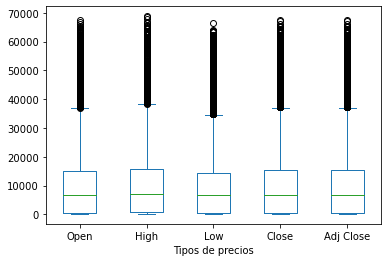

In [23]:
puntero_de_la_grafica = df_index_asia_pacif[["Open", "High", "Low", "Close",'Adj Close']].plot.box()
puntero_de_la_grafica.set_xlabel("Tipos de precios")

## Reading more than one time serie and merging it in one dataframe.


In [24]:
#!pip install --upgrade --force-reinstall pandas_datareader

In [25]:
#########################################
#                                       #
#              READING DATA             #
#                                       #
#########################################
import pandas_datareader.data as web
import pandas as pd
import time

ticker_asia_pacif =  '000001.SS' # SSE Composite Index (000001.SS) -  Shanghai, China
ticker_europe_africa_middleeast = '^IBEX'  # CAC 40 (^FCHI) - Paris, France
ticker_americas = '^BVSP' # IBOVESPA (^BVSP) - Sao Paolo, Brazil

#YAHOO is very unstable lately, so it is a good idea to insist until it reads. Actually, t can be a good idea to put a
# loop to insist in the job of grabbing the data and waiting 5 seccounds for next try.
run_ok = 0
numb_tries = 0 
while(run_ok == 0) and (numb_tries < 10):
    try:        
        numb_tries += 1
        df_index_asia_pacif = pdr.get_data_yahoo(ticker_asia_pacif, start='2012-01-12', end='2017-01-12')
        df_index_europe_africa_middleeast = pdr.get_data_yahoo(ticker_europe_africa_middleeast, start='2012-01-12', end='2017-01-12')
        df_index_americas = pdr.get_data_yahoo(ticker_americas, start='2012-01-12', end='2017-01-12') 
        
        
        run_ok = 1
    except:
        print ("-> PROBLEM WITH YAHOO - SLEEPING 5 seconds")
        time.sleep(5)
        run_ok = 0

df_merged = pd.DataFrame({ 'adj_close_asia_pacif': df_index_asia_pacif['Adj Close'],
                            'adj_close_europe_africa_middleeast': df_index_europe_africa_middleeast['Adj Close'],
                            'adj_close_americas': df_index_americas['Adj Close']},
                        index=sorted(set(df_index_asia_pacif.index).union(df_index_europe_africa_middleeast.index).union(df_index_americas.index))) 
  

Now that we merged data from 3 different countries, holidays are different, so we start having data in one day for one country, but not for others. We have to do something with the missing!

In [26]:
print(df_merged)

            adj_close_asia_pacif  adj_close_europe_africa_middleeast  \
2012-01-12           2275.010010                         8426.991211   
2012-01-13           2244.580078                         8450.590820   
2012-01-16           2206.193115                         8449.590820   
2012-01-17           2298.375000                         8535.291016   
2012-01-18           2266.384033                         8420.691406   
...                          ...                                 ...   
2017-01-09           3171.236084                         9492.799805   
2017-01-10           3161.670898                         9452.000000   
2017-01-11           3136.753906                         9408.599609   
2017-01-12           3119.289062                         9407.400391   
2017-01-13           3112.763916                                 NaN   

            adj_close_americas  
2012-01-12             59921.0  
2012-01-13             59147.0  
2012-01-16             59956.0  
201

In [27]:
print(df_merged.isnull().sum())

adj_close_asia_pacif                  82
adj_close_europe_africa_middleeast    19
adj_close_americas                    61
dtype: int64


Reindexing will insert missing values (NaN) for the dates that were not present in the original set. To cope with this, we can fill the missing by replacing them with the latest available price for each instrument, which is more correct in this context than dropping the rows using dropna.

In [28]:
df_merged = df_merged.fillna(method='ffill')

In [29]:
df_merged.tail()

,adj_close_asia_pacif,adj_close_europe_africa_middleeast,adj_close_americas
2017-01-09,3171.236084,9492.799805,61700.0
2017-01-10,3161.670898,9452.000000,62132.0
2017-01-11,3136.753906,9408.599609,62446.0
2017-01-12,3119.289062,9407.400391,63954.0
2017-01-13,3112.763916,9407.400391,63954.0


If we still have NaN at the begining of the series, we have no choice but drop them, because we don't have a previous data to copy!

In [30]:
df_merged = df_merged.dropna()
df_merged.head()

,adj_close_asia_pacif,adj_close_europe_africa_middleeast,adj_close_americas
2012-01-12,2275.010010,8426.991211,59921.0
2012-01-13,2244.580078,8450.590820,59147.0
2012-01-16,2206.193115,8449.590820,59956.0
2012-01-17,2298.375000,8535.291016,60646.0
2012-01-18,2266.384033,8420.691406,61723.0


## Let's plot the 3 indexes in the same graph.

Notice %matplotlib noteboook, a feature in jupyter notebooks that allows us to forego using plt.show() everytime we want to see a plot.

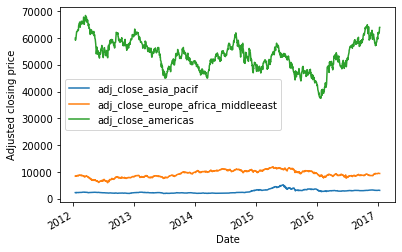

In [31]:
#########################################
#       Pandas Built-in Matplotlib      #
#########################################
%matplotlib inline
ax = df_merged[['adj_close_asia_pacif','adj_close_europe_africa_middleeast','adj_close_americas']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price')
ax.legend()


As each index has it is one scale, max and min, it is difficult to interpret if we plot them together in the same graph.

So, let's normalize it dividing it by its maximum.

In [32]:
df_merged['norm_adj_close_asia_pacif'] = df_merged['adj_close_asia_pacif'] / df_merged['adj_close_asia_pacif'].iloc[0]
df_merged['norm_adj_close_europe_africa_middleeast'] = df_merged['adj_close_europe_africa_middleeast'] / \
    df_merged['adj_close_europe_africa_middleeast'].iloc[0]
df_merged['norm_adj_close_americas'] = df_merged['adj_close_americas'] / df_merged['adj_close_americas'].iloc[0]


## Plotting normalized indexes in the same graph.

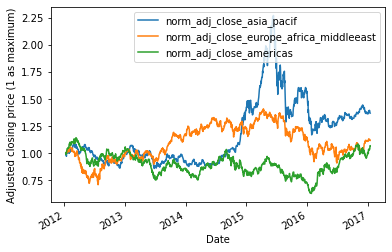

In [33]:
%matplotlib inline
ax = df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (1 as maximum)')
ax.legend()

MORE PANDAS BUILT-IN GRAPHS: https://pandas.pydata.org/pandas-docs/stable/visualization.html

## Plotting using Matplotlib own functions

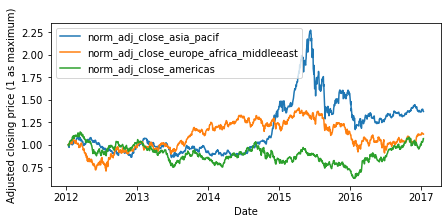

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=(7,3))
ax = fig.add_subplot(1,1,1)
ax.plot(df_merged.index, df_merged['norm_adj_close_asia_pacif'], label='norm_adj_close_asia_pacif')
ax.plot(df_merged.index, df_merged['norm_adj_close_europe_africa_middleeast'], label='norm_adj_close_europe_africa_middleeast')
ax.plot(df_merged.index, df_merged['norm_adj_close_americas'], label='norm_adj_close_americas')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (1 as maximum)')
ax.legend()

# Let's stop a bit to review the slicing power of PANDAS

df_merged[*list_of_names*][*slicing_rule_for_rows*][*slicing_pattern_for_rows*]

Let's only print the normalized columns, and then start printing from row 3, then stop on row 9 with a step of 2.

list = ['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']

slicing criteria = df_merged['norm_adj_close_asia_pacif'] > 0.39

slicing pattern = 2:10:2


In [35]:
df_merged[['adj_close_asia_pacif']]

,adj_close_asia_pacif
2012-01-12,2275.010010
2012-01-13,2244.580078
2012-01-16,2206.193115
2012-01-17,2298.375000
2012-01-18,2266.384033
...,...
2017-01-09,3171.236084
2017-01-10,3161.670898
2017-01-11,3136.753906
2017-01-12,3119.289062


In [36]:
df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']]

,norm_adj_close_asia_pacif,norm_adj_close_europe_africa_middleeast,norm_adj_close_americas
2012-01-12,1.000000,1.000000,1.000000
2012-01-13,0.986624,1.002800,0.987083
2012-01-16,0.969751,1.002682,1.000584
2012-01-17,1.010270,1.012852,1.012099
2012-01-18,0.996208,0.999252,1.030073
...,...,...,...
2017-01-09,1.393944,1.126476,1.029689
2017-01-10,1.389739,1.121634,1.036899
2017-01-11,1.378787,1.116484,1.042139
2017-01-12,1.371110,1.116342,1.067305


In [37]:
[True,False]*int(1298/2)

[True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 Fa

In [38]:
df_merged.head()

,adj_close_asia_pacif,adj_close_europe_africa_middleeast,adj_close_americas,norm_adj_close_asia_pacif,norm_adj_close_europe_africa_middleeast,norm_adj_close_americas
2012-01-12,2275.010010,8426.991211,59921.0,1.000000,1.000000,1.000000
2012-01-13,2244.580078,8450.590820,59147.0,0.986624,1.002800,0.987083
2012-01-16,2206.193115,8449.590820,59956.0,0.969751,1.002682,1.000584
2012-01-17,2298.375000,8535.291016,60646.0,1.010270,1.012852,1.012099
2012-01-18,2266.384033,8420.691406,61723.0,0.996208,0.999252,1.030073


In [39]:
df_merged[[True,False]*int(1298/2)].head()

,adj_close_asia_pacif,adj_close_europe_africa_middleeast,adj_close_americas,norm_adj_close_asia_pacif,norm_adj_close_europe_africa_middleeast,norm_adj_close_americas
2012-01-12,2275.010010,8426.991211,59921.0,1.000000,1.000000,1.000000
2012-01-16,2206.193115,8449.590820,59956.0,0.969751,1.002682,1.000584
2012-01-18,2266.384033,8420.691406,61723.0,0.996208,0.999252,1.030073
2012-01-20,2319.117920,8561.891602,62312.0,1.019388,1.016008,1.039903
2012-01-24,2319.117920,8591.391602,62486.0,1.019388,1.019509,1.042806


In [40]:
df_merged['norm_adj_close_asia_pacif'] > 1.3

2012-01-12    False
2012-01-13    False
2012-01-16    False
2012-01-17    False
2012-01-18    False
              ...  
2017-01-09     True
2017-01-10     True
2017-01-11     True
2017-01-12     True
2017-01-13     True
Name: norm_adj_close_asia_pacif, Length: 1298, dtype: bool

In [41]:
df_merged[df_merged['norm_adj_close_asia_pacif'] > 1.3]

,adj_close_asia_pacif,adj_close_europe_africa_middleeast,adj_close_americas,norm_adj_close_asia_pacif,norm_adj_close_europe_africa_middleeast,norm_adj_close_americas
2014-12-08,3021.523926,10805.189453,50274.0,1.328137,1.282212,0.839005
2014-12-16,3021.518066,10081.890625,47008.0,1.328134,1.196381,0.784500
2014-12-17,3061.020020,10049.490234,48714.0,1.345497,1.192536,0.812970
2014-12-18,3057.520996,10391.289062,48496.0,1.343959,1.233096,0.809332
2014-12-19,3108.595947,10363.588867,49651.0,1.366410,1.229809,0.828608
...,...,...,...,...,...,...
2017-01-09,3171.236084,9492.799805,61700.0,1.393944,1.126476,1.029689
2017-01-10,3161.670898,9452.000000,62132.0,1.389739,1.121634,1.036899
2017-01-11,3136.753906,9408.599609,62446.0,1.378787,1.116484,1.042139
2017-01-12,3119.289062,9407.400391,63954.0,1.371110,1.116342,1.067305


In [42]:
df_merged.head()

,adj_close_asia_pacif,adj_close_europe_africa_middleeast,adj_close_americas,norm_adj_close_asia_pacif,norm_adj_close_europe_africa_middleeast,norm_adj_close_americas
2012-01-12,2275.010010,8426.991211,59921.0,1.000000,1.000000,1.000000
2012-01-13,2244.580078,8450.590820,59147.0,0.986624,1.002800,0.987083
2012-01-16,2206.193115,8449.590820,59956.0,0.969751,1.002682,1.000584
2012-01-17,2298.375000,8535.291016,60646.0,1.010270,1.012852,1.012099
2012-01-18,2266.384033,8420.691406,61723.0,0.996208,0.999252,1.030073


In [43]:
df_merged[0:-3]

,adj_close_asia_pacif,adj_close_europe_africa_middleeast,adj_close_americas,norm_adj_close_asia_pacif,norm_adj_close_europe_africa_middleeast,norm_adj_close_americas
2012-01-12,2275.010010,8426.991211,59921.0,1.000000,1.000000,1.000000
2012-01-13,2244.580078,8450.590820,59147.0,0.986624,1.002800,0.987083
2012-01-16,2206.193115,8449.590820,59956.0,0.969751,1.002682,1.000584
2012-01-17,2298.375000,8535.291016,60646.0,1.010270,1.012852,1.012099
2012-01-18,2266.384033,8420.691406,61723.0,0.996208,0.999252,1.030073
...,...,...,...,...,...,...
2017-01-04,3158.793945,9462.900391,61589.0,1.388475,1.122928,1.027837
2017-01-05,3165.410889,9488.200195,62071.0,1.391383,1.125930,1.035881
2017-01-06,3154.321045,9515.900391,61665.0,1.386509,1.129217,1.029105
2017-01-09,3171.236084,9492.799805,61700.0,1.393944,1.126476,1.029689


In [44]:
df_merged[2:10:2]

,adj_close_asia_pacif,adj_close_europe_africa_middleeast,adj_close_americas,norm_adj_close_asia_pacif,norm_adj_close_europe_africa_middleeast,norm_adj_close_americas
2012-01-16,2206.193115,8449.590820,59956.0,0.969751,1.002682,1.000584
2012-01-18,2266.384033,8420.691406,61723.0,0.996208,0.999252,1.030073
2012-01-20,2319.117920,8561.891602,62312.0,1.019388,1.016008,1.039903
2012-01-24,2319.117920,8591.391602,62486.0,1.019388,1.019509,1.042806


## Combining criterias

In [45]:
df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']][2:10:2]


,norm_adj_close_asia_pacif,norm_adj_close_europe_africa_middleeast,norm_adj_close_americas
2012-01-16,0.969751,1.002682,1.000584
2012-01-18,0.996208,0.999252,1.030073
2012-01-20,1.019388,1.016008,1.039903
2012-01-24,1.019388,1.019509,1.042806


In [46]:
df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']][df_merged['norm_adj_close_asia_pacif'] > 1.4][2:10:2]

,norm_adj_close_asia_pacif,norm_adj_close_europe_africa_middleeast,norm_adj_close_americas
2015-01-05,1.472749,1.185867,0.792994
2015-01-07,1.483050,1.173775,0.825470
2015-01-09,1.444131,1.153317,0.815073
2015-01-13,1.422104,1.182627,0.801756


---

# Type of graphs - Static vs. Dynamic

<img src="img/MatplotLib_Bokeh.png" width=1000 height=800 align="left">

## Bokeh graphics
---

In [47]:
!pip install bokeh

Defaulting to user installation because normal site-packages is not writeable


In [48]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
import numpy as np

def datetime_transf(x):
    return np.array(x, dtype=np.datetime64)

p1 = figure(x_axis_type="datetime", title='Adjusted closing price (1 as maximum)')
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'
p1.line(datetime_transf(df_merged.index), df_merged['norm_adj_close_asia_pacif'], color='#A6CEE3', legend=ticker_asia_pacif)
p1.line(datetime_transf(df_merged.index), df_merged['norm_adj_close_europe_africa_middleeast'], color='#B2DF8A', 
        legend=ticker_europe_africa_middleeast)
p1.line(datetime_transf(df_merged.index), df_merged['norm_adj_close_americas'], color='#FB9A99', legend=ticker_americas)
output_file("three_indexes.html", title="Manoel Gadi Example")
show(gridplot([[p1]], plot_width=600, plot_height=600))  # open a browser    

https://demo.bokeh.org/

---

# Further references on graphs

## Matplotlib

Below is a introduction to the main graphing packages that python has. We'll focus on:

- Matplotlib (pyplot specifically)
- Seaborn (Statistical plots package)

First we load the required libraries. Notice %matplotlib inline, a feature in jupyter notebooks that allows us to forego using plt.show() everytime we want to see a plot.


__BUG: There is a bug on ggplot that need fixing to access the sample data:__
https://github.com/yhat/ggpy/issues/662

In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.style
%matplotlib inline

#data
#from ggplot import diamonds
#from ggplot import mtcars

In [50]:
diamonds =  pd.read_csv("datasets/diamonds.csv")

We import the Diamonds and the Mtcars dataset to make some plots.

In [51]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
mtcars = pd.read_csv("datasets/mtcars.csv")

In [53]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We look at the data in some more detail to make sure we know what kind of variables it has. For plotting it is extremely important that we know whether a variable is categorical or numerical.

In [54]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Let's start with how we make a simple plots, there is different ways to tell matplotlib what columns we want to focus on.

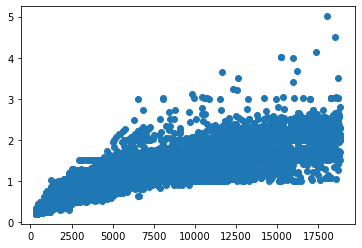

In [55]:
# 2 Ways of calling variables :
#Brackets
plt.scatter( 
x = diamonds['price'], 
y = diamonds['carat'])

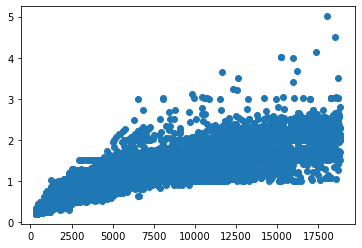

In [56]:
#Dots
plt.scatter(
x = diamonds.price,
y = diamonds.carat)


We also can very easily set themes for our plots with matplotlib.style.use. For all of you ggplot fans we can get that look back!

In [57]:
# Personnalize your matplotlib

#matplotlib.style.use('ggplot')
#matplotlib.style.use('dark_background')

plt.style.use('default')


### Main plots that are used
- plt.hist()
- plt.bar()
- plt.plot()
- plt.scatter()

### Plotting a simple scatter plot

Using the diamonds dataset to do a simple scatter plot

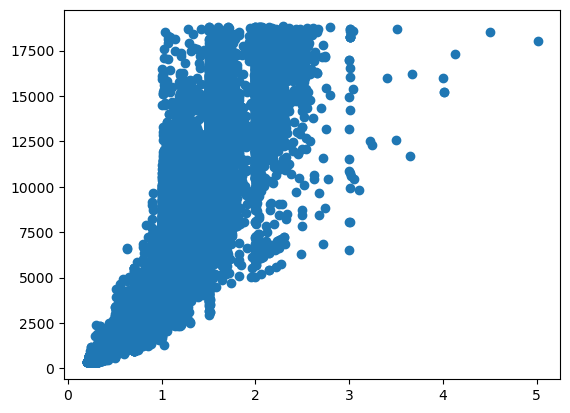

In [58]:
plt.scatter(x=diamonds.carat,y=diamonds.price)

### Customizing the plot title and axis title

We could use xlabel and ylabel to add axis titles in the graph


Text(0.5, 1.0, 'Diamonds')

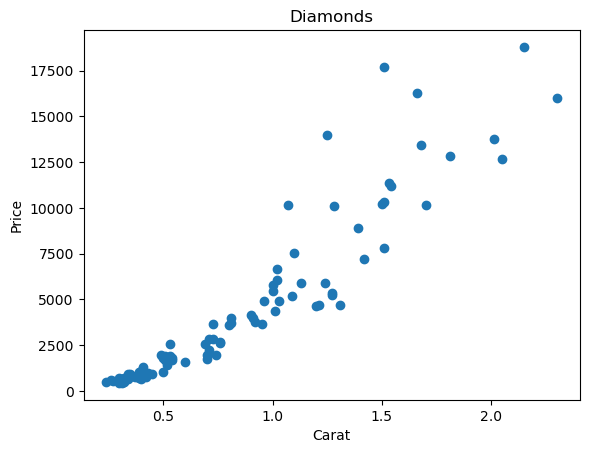

In [59]:
df=diamonds.sample(100,random_state=22)
plt.scatter(x=df.carat,y=df.price)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing: Changing the shape

We could use the marker function in plt.scatter to to change the shape of the chart

Text(0.5, 1.0, 'Diamonds')

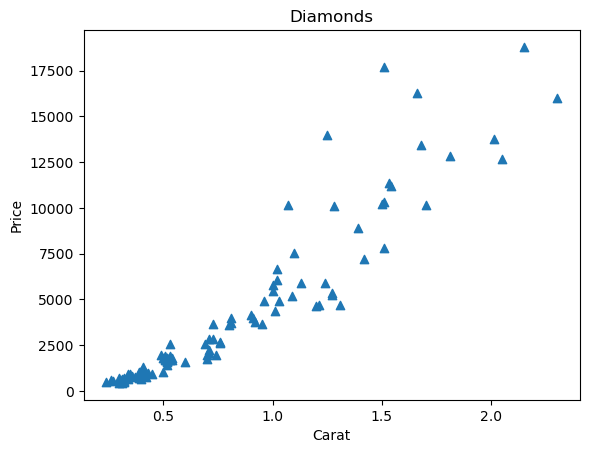

In [60]:
plt.scatter(x=df.carat,y=df.price,marker='^')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing : Changing the color (Option 1)

We could change the color by adding the parameter c=(color code) in plt.scatter

Text(0.5, 1.0, 'Diamonds')

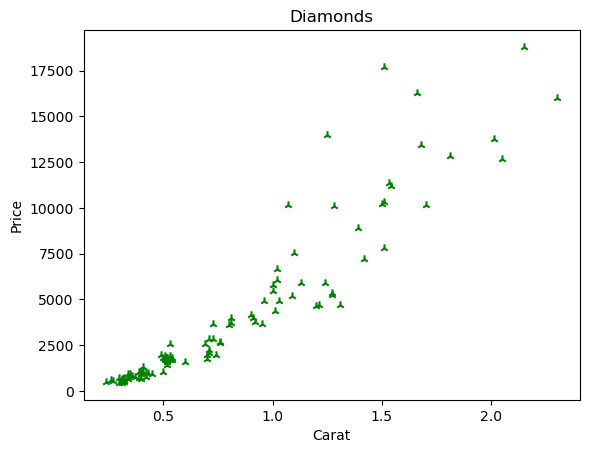

In [61]:
plt.scatter(x=df.carat,y=df.price,c='g',
marker='2')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing: Changing the color (Option 2)

We could also change the color by using the hexadecimal format

Text(0.5, 1.0, 'Diamonds')

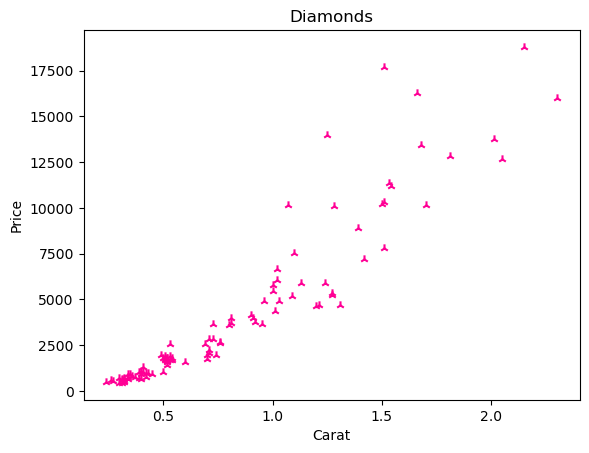

In [62]:
plt.scatter(x=df.carat,y=df.price,c='#ff0095',
marker='2')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing: Annotations

We could add annotations using plt.annotate to highlight outliers or influencers

Text(2, 10000, 'Most expensive Diamond')

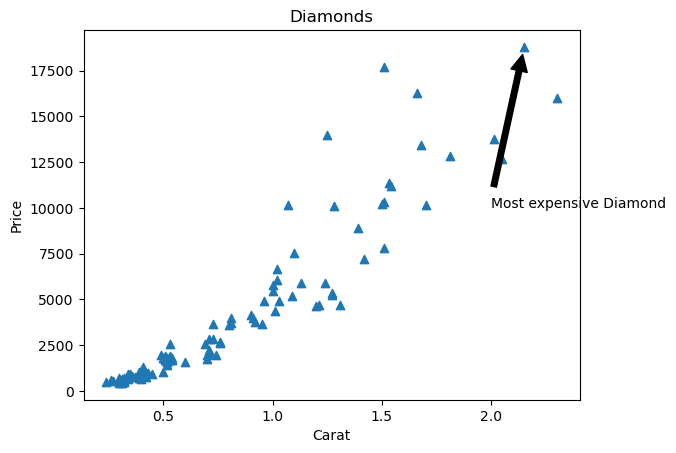

In [63]:
plt.scatter(x=df.carat,y=df.price,marker='^')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")
y_max=max(df.price)
x_max=df.carat[df.price==y_max]
plt.annotate('Most expensive Diamond', xy=(x_max,y_max), xytext=(2, 10000),
    arrowprops=dict(facecolor='black', shrink=0.05))

### Customizing: Addining an equation to chart

We could add an equation to an existing chart by using the plt.text function

Text(1.17, 2500, 'ln(y) = $b_0 + \\sum_{j=1}^p b_j*x_j$')

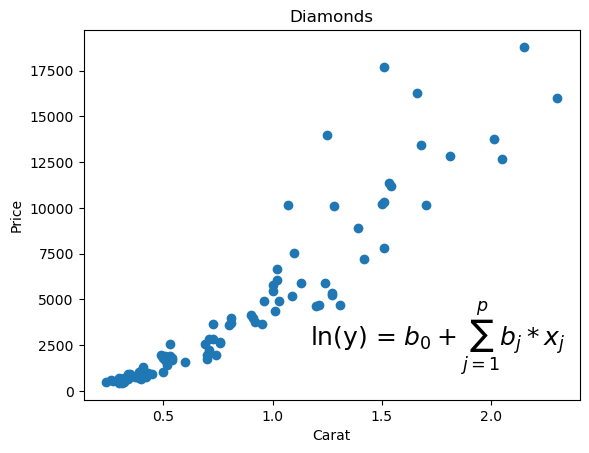

In [64]:
plt.scatter (x=df.carat,y=df.price)
plt.xlabel ("Carat")
plt.ylabel ("Price")
plt.title ("Diamonds")
plt.text(1.17, 2500, r'ln(y) = $b_0 + \sum_{j=1}^p b_j*x_j$', fontsize=18)

### Extra customization
First, a simple plot. We take a sample to make customization clearer.

0.33999999999999997
2.5999999999999996


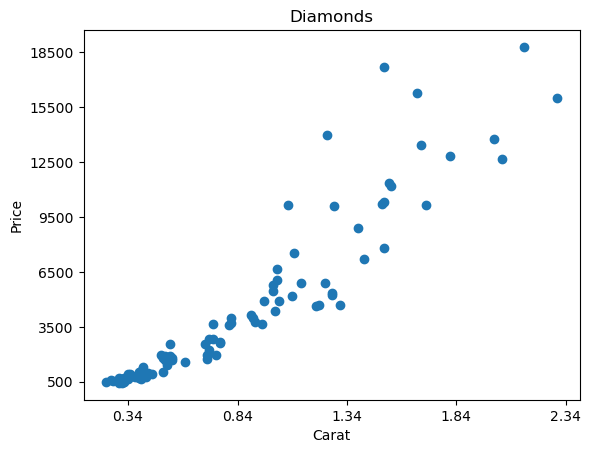

In [65]:
#first graph simple xticks and yticks
plt.scatter(df.carat,df.price,)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.xticks(np.arange(min(df.carat)+0.1, max(df.carat)+0.3, 0.5))
plt.yticks(np.arange(500, max(df.price)+2000, 3000))
plt.title("Diamonds")
print(min(df.carat)+0.1)
print( max(df.carat)+0.3)

And now with a tight layout

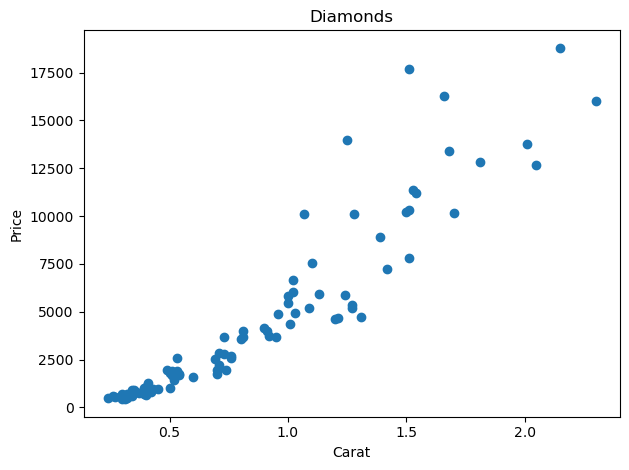

In [66]:
#the same with tight layout
plt.scatter(df.carat,df.price,)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")
plt.tight_layout()

Let's add some limits on the axis.

Text(0.5, 1.0, 'Diamonds')

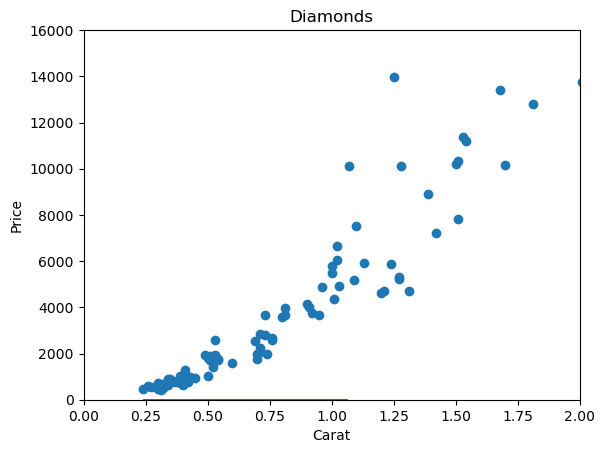

In [67]:
# xlim and y lim
plt.scatter(df.carat,df.price,)
plt.hist(df.carat)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.xlim(0,2)
plt.ylim(0,16000)
plt.title("Diamonds")

Let's look at double axes.

## Seaborn statistical plots
### First Univariate plots

In [68]:
import seaborn as sns

<AxesSubplot:xlabel='cut', ylabel='price'>

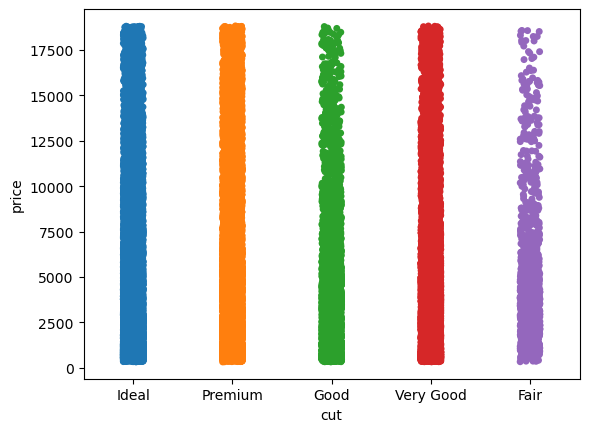

In [69]:
sns.stripplot(x='cut', y='price', data=diamonds)

Swarmplot is similar but spreads out points, it's slow! careful with it. Better for visibility.

<AxesSubplot:xlabel='cyl', ylabel='mpg'>

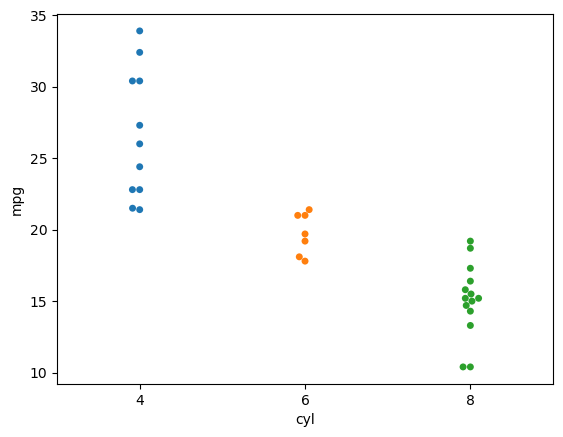

In [70]:
sns.swarmplot(x='cyl', y='mpg', data=mtcars)

A violinplot is a version of a boxplot that shows where most of the datapoints are located.

<AxesSubplot:xlabel='cut', ylabel='price'>

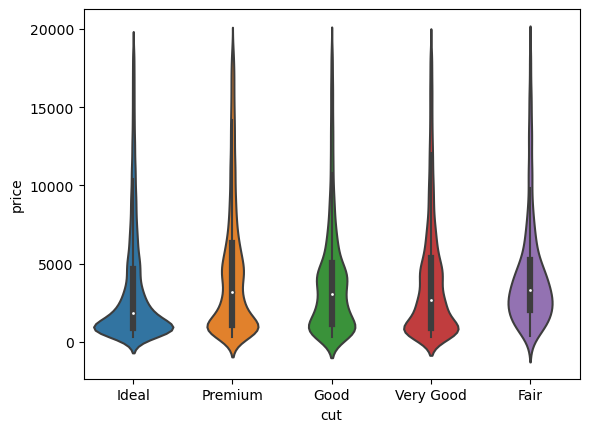

In [71]:
sns.violinplot(x='cut', y='price', data=diamonds)

### Multivariate plots
Jointplot combines a scatter plot with some correlation information and distribution of the points (histograms).

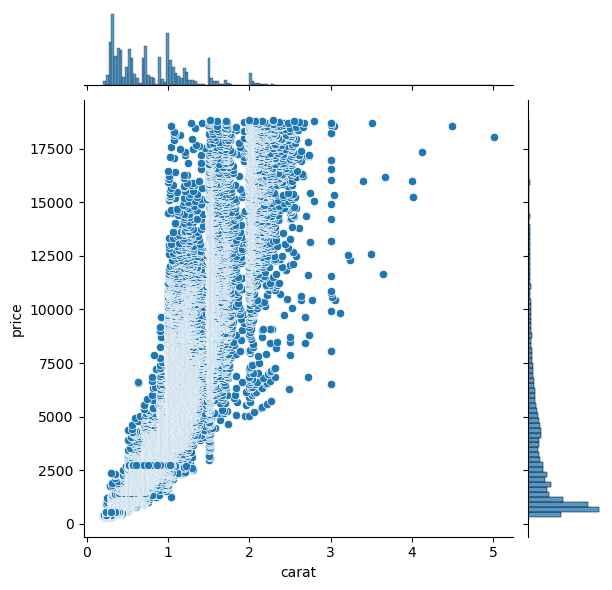

In [72]:
sns.jointplot(x='carat', y='price', data=diamonds)

A pairplot makes plots for each combinations of variables.

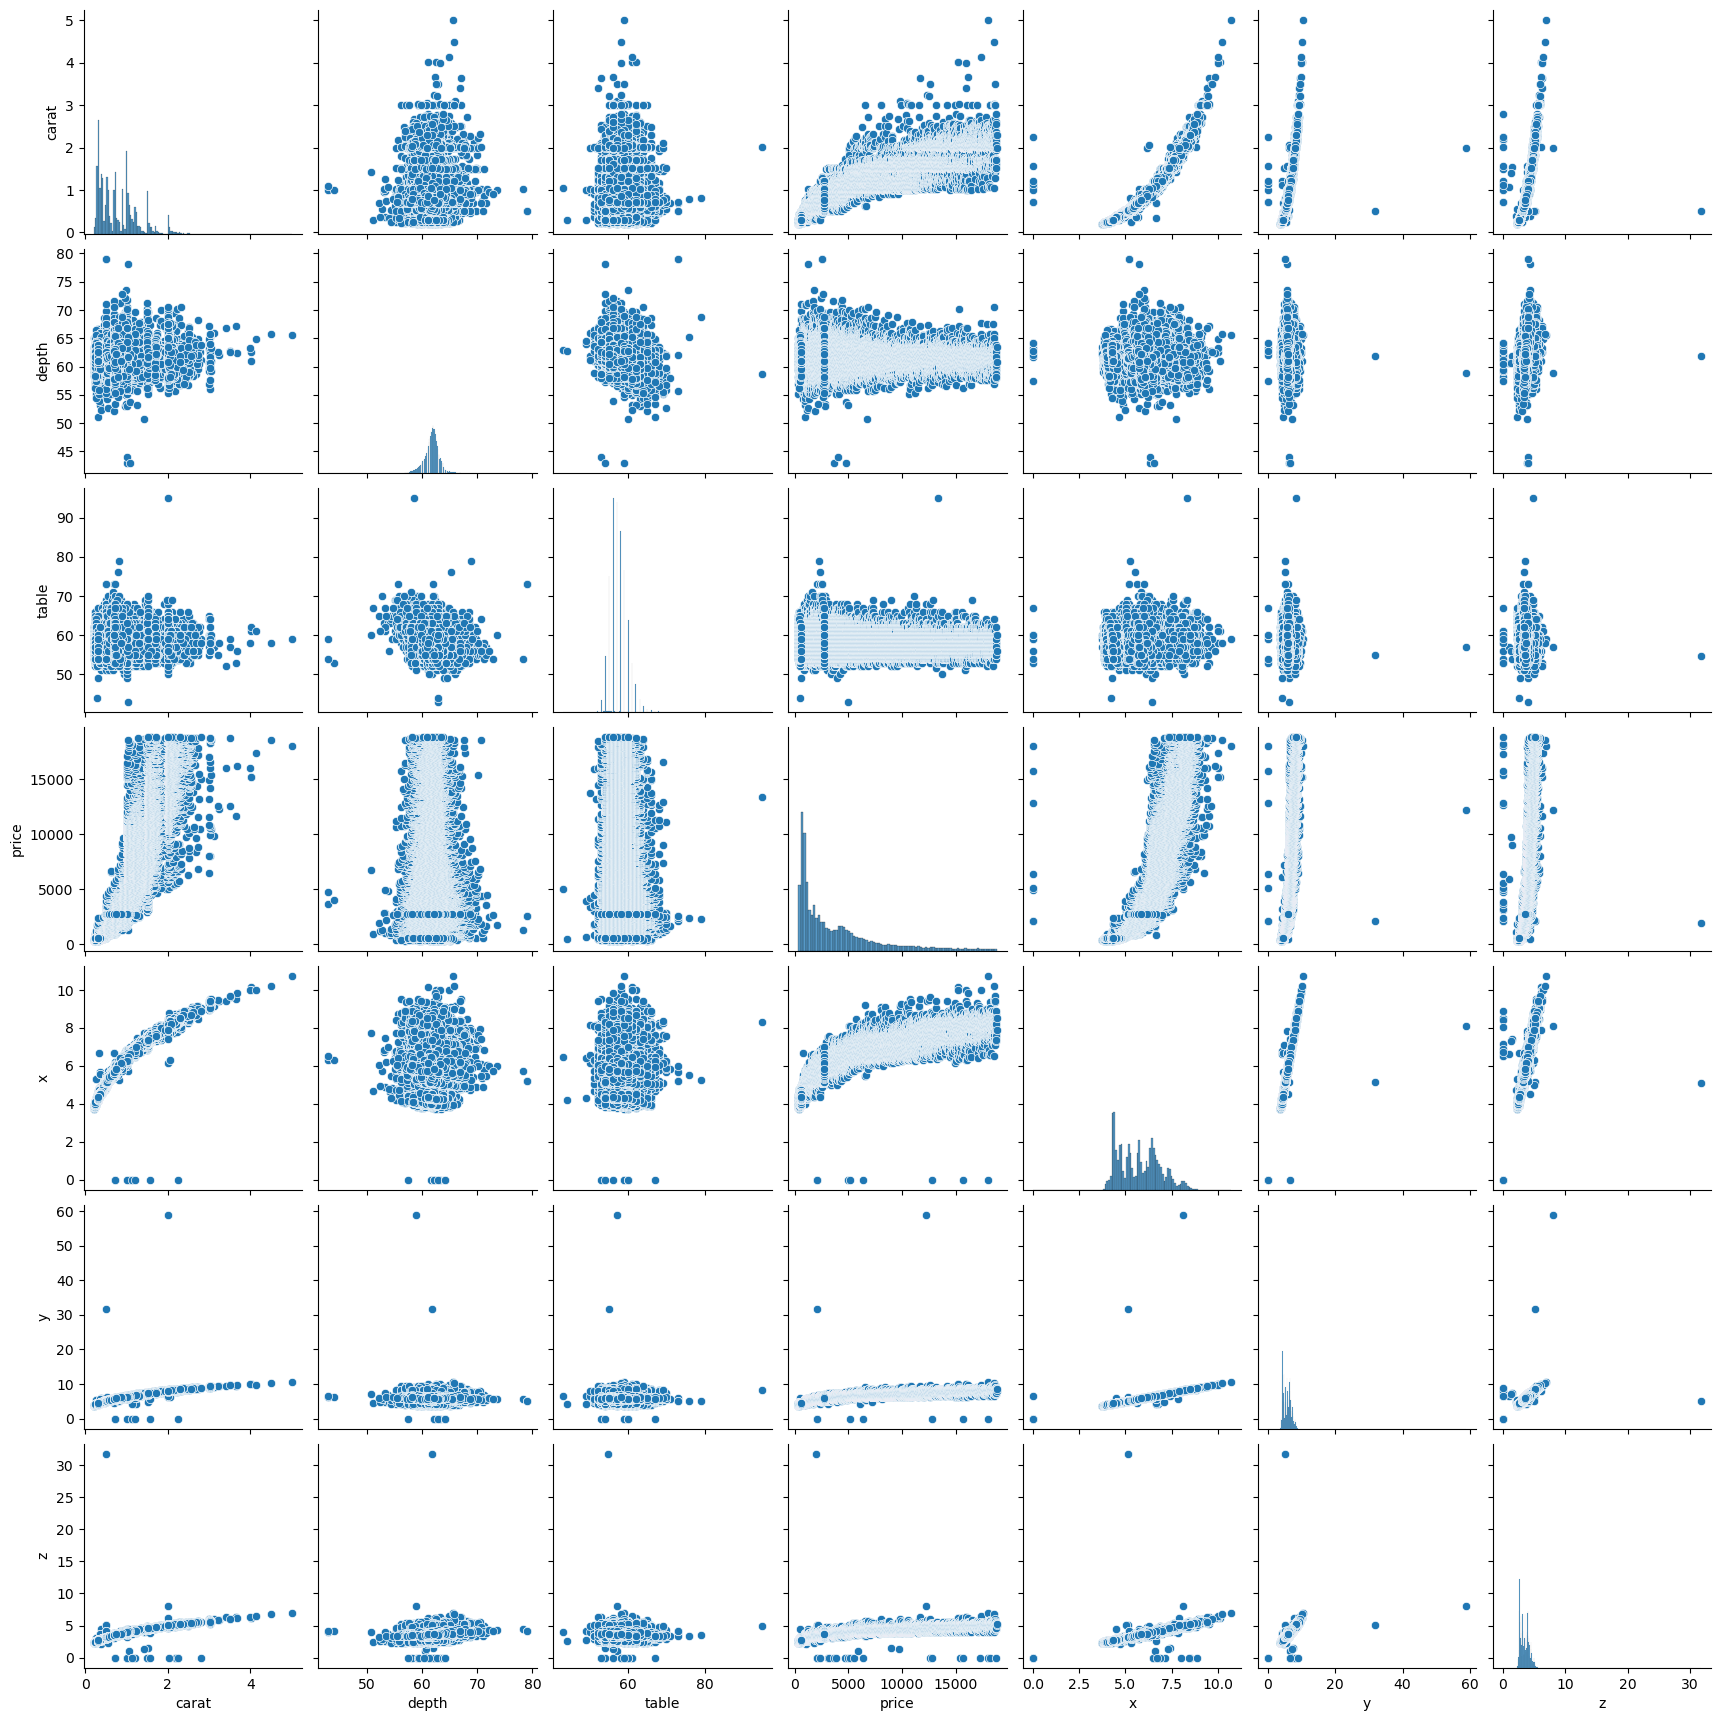

In [73]:
sns.pairplot(data=diamonds)

## We can also customize the color based on a different variable.

The next code takes too much time and resource, you can try running at your own risk! I don't recommend!

In [74]:
#sns.pairplot(data=diamonds, hue='carat')

---

Let's also look at correlations between the numerical variables and plot them in a heatmap.

In [75]:
diamonds2 = diamonds.drop(diamonds.columns[[1, 2, 3]], axis=1)

In [76]:
diamonds2.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:>

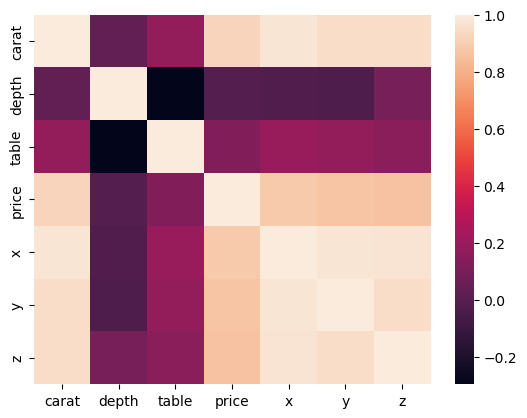

In [77]:
covars = diamonds2.corr()
sns.heatmap(covars)

### statistical plots
Seaborn is really good for statistics. Automatically including regression lines with lmplot.

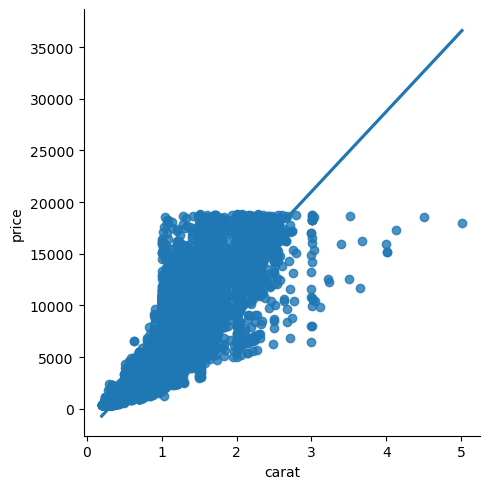

In [78]:
sns.lmplot(x='carat', y='price', data=diamonds)

Customization is a bit tricky because you need to access the underlying matplotlib code with a dictionary.

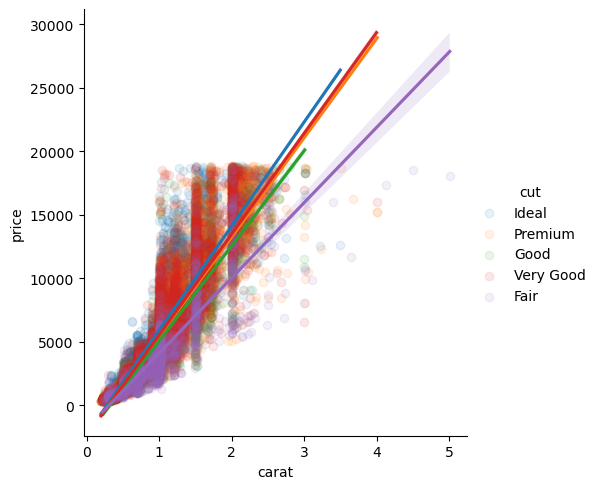

In [79]:
sns.lmplot(x='carat', y='price', data=diamonds, hue='cut', scatter_kws={'alpha':0.1})

We can also do a regplot which allows for higher order polynomial regressions.

<AxesSubplot:xlabel='carat', ylabel='price'>

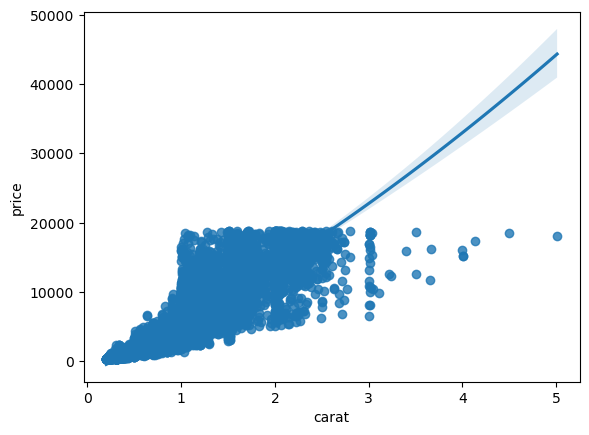

In [80]:
sns.regplot(x='carat', y='price', data=diamonds, order=2)

Residual analysis is also very easy.

<AxesSubplot:xlabel='carat', ylabel='price'>

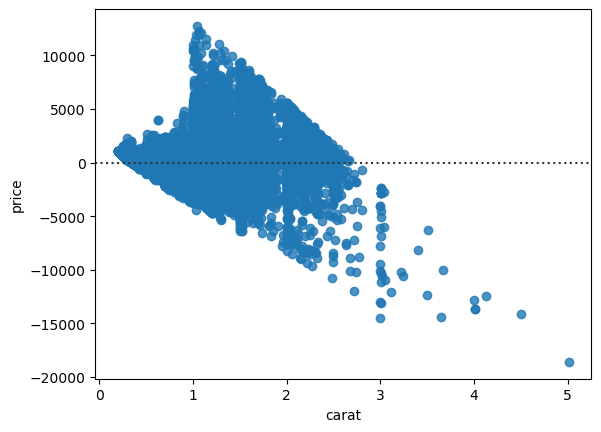

In [81]:
sns.residplot(x='carat', y='price', data=diamonds)

And finally, just a simple boxplot!

<AxesSubplot:xlabel='cut', ylabel='price'>

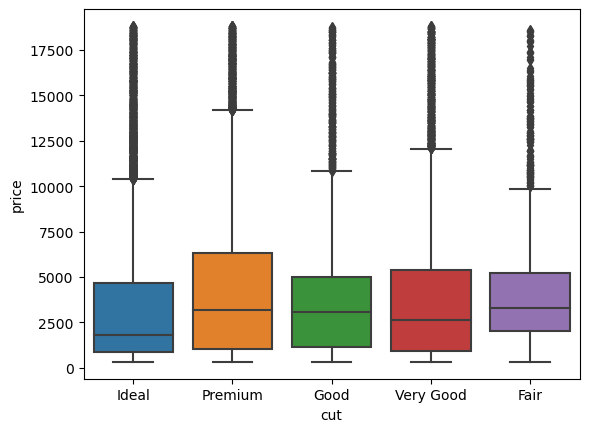

In [82]:
sns.boxplot(x='cut', y='price', data=diamonds)

# Exercise

* Picks tree indexes from the list: https://finance.yahoo.com/world-indices
* instead of dividing by the .max, divide by the first value using .loc[0]
* finally, respond: which would have been the best investiment in the period?

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr

ticker_asia_pacif = '000001.SS' # SSE Composite Index (000001.SS) -  Shanghai, China
ticker_europe_africa_middleeast = '^FCHI'  # CAC 40 (^FCHI) - Paris, France
ticker_americas = '^BVSP' # IBOVESPA (^BVSP) - Sao Paolo, Brazil

#YAHOO is very unstable lately, so it is a good idea to insist until it reads. Actually, t can be a good idea to put a
# loop to insist in the job of grabbing the data and waiting 5 seccounds for next try.
run_ok = 0
numb_tries = 0 
while(run_ok == 0) and (numb_tries < 10):
    try:        
        numb_tries += 1
        df_index_asia_pacif = pdr.get_data_yahoo(ticker_asia_pacif, start='2012-01-12', end='2017-01-12')
        df_index_europe_africa_middleeast = pdr.get_data_yahoo(ticker_europe_africa_middleeast, start='2012-01-12', end='2017-01-12')
        df_index_americas = pdr.get_data_yahoo(ticker_americas, start='2012-01-12', end='2017-01-12') 
        run_ok = 1
    except:
        print ("-> PROBLEM WITH YAHOO - SLEEPING 5 seconds")
        time.sleep(5)
        run_ok = 0

df_merged = pd.DataFrame({ 'adj_close_asia_pacif': df_index_asia_pacif['Adj Close'],
                            'adj_close_europe_africa_middleeast': df_index_europe_africa_middleeast['Adj Close'],
                            'adj_close_americas': df_index_americas['Adj Close']},
                        index=sorted(set(df_index_asia_pacif.index).union(df_index_europe_africa_middleeast.index).union(df_index_americas.index))) 

df_merged = df_merged.fillna(method='ffill') 

df_merged = df_merged.dropna()
df_merged['norm_adj_close_asia_pacif'] = df_merged['adj_close_asia_pacif'] / \
    df_merged['adj_close_asia_pacif'].iloc[0]
df_merged['norm_adj_close_europe_africa_middleeast'] = df_merged['adj_close_europe_africa_middleeast'] / \
    df_merged['adj_close_europe_africa_middleeast'].iloc[0]
df_merged['norm_adj_close_americas'] = df_merged['adj_close_americas'] / \
    df_merged['adj_close_americas'].iloc[0]

%matplotlib inline
ax = df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (1 as maximum)')
ax.legend()

---